# PCA como compresor de la información

En esta segunda parte, vamos a explorar la aplicación de componentes principales para comprimir la información. La idea es que quizás no haga falta quedarse con todos los features sino que basta con las primeras componentes principales para reproducir aproximadamente un dado dataset, sobre todo si este ocupase mucho espacio en memoria.

#### Carga de librerías


In [ ]:
# Librerias generales
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

Importemos la clase que nos va a permitir realizar PCA, además del módulo para estandarizar nuestras variables, que suele ser una práctica habitual antes de aplicar PCA.

In [ ]:
# Clase para realizar componentes principales
from sklearn.decomposition import PCA

# Estandarizador (transforma las variables en z-scores)
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler() # Creamos el estandarizador

## Dataset de caras

Vamos a trabajar con el dataset de caras utilizado en la clase de *kNN*, que ya viene precargado en scikit-learn:

In [ ]:
from sklearn.datasets import fetch_olivetti_faces # para cargar el dataset de caras
data, targets = fetch_olivetti_faces(return_X_y = True) # cargamos las caras

print('Dimensión de los datos {}'.format(data.shape))

Dimensión de los datos (400, 4096)


Ploteo de algunas caras:

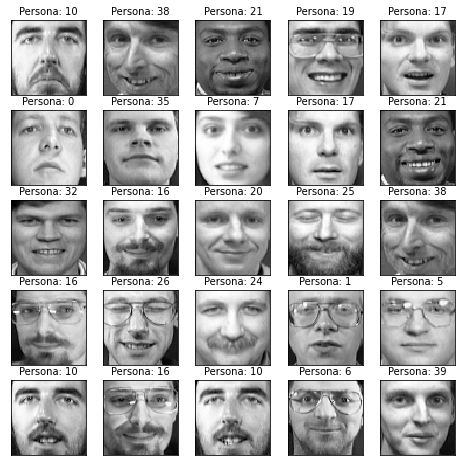

In [ ]:
# Ploteo 25 imagenes al azar
fig = plt.figure(figsize = (8,8)) # seteo el tamano de la figura
for i in range(25):
    j = np.random.randint(0, data.shape[0]) # en cada iteracion elijo un numero random entre 0 y la longitud de train_raw 
    plt.subplot(5,5,i+1) # Voy a tener una matriz de 5x5 subplots y voy llenando en la iteracion i-esima el subplot i+1
    plt.imshow(data[j,:].reshape(64,64), interpolation='none', cmap="gray") # plotea una imagen random, pues es la imagen j-esima del set de entrenamiento, en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
    plt.title("Persona: {}".format(targets[j]), fontsize = 10) # pongo el titulo a los plots con el identificador unico de la persona 
    plt.xticks([]) # le saco los ticks en el eje X
    plt.yticks([]) # le saco los ticks en el eje Y
plt.show()


### Visualización en el espacio bidimensional de las componentes principales

Cada una de las caras está descrito por un vector de $4096$ píxeles. Es decir, podemos pensar nuestro dataset como compuesto por $400$ instancias en un espacio de $4096$ features. Debido a que mucho de estos features pueden estar fuertemente correlacionados (pensar en píxeles adyacentes) podemos quizás encontrar combinación de los mismos que nos permita reducir el espacio en el cual viven nuestros datos.

Veamos qué pasa si esa reducción la hacemos en el espacio de las dos primeras componentes principales (pregunta, ¿hace falta estandarizar las variables en este problema?):

In [ ]:
# Creación del modelo de PCA con 2 componentes
pca = PCA(n_components = 2)

# Ajuste y transformación de los datos
pca.fit(data)
X_pca = pca.transform(data)

Veamos cómo se ubican cada uno de los datos en este espacio:

Text(0, 0.5, 'Segunda componente principal')

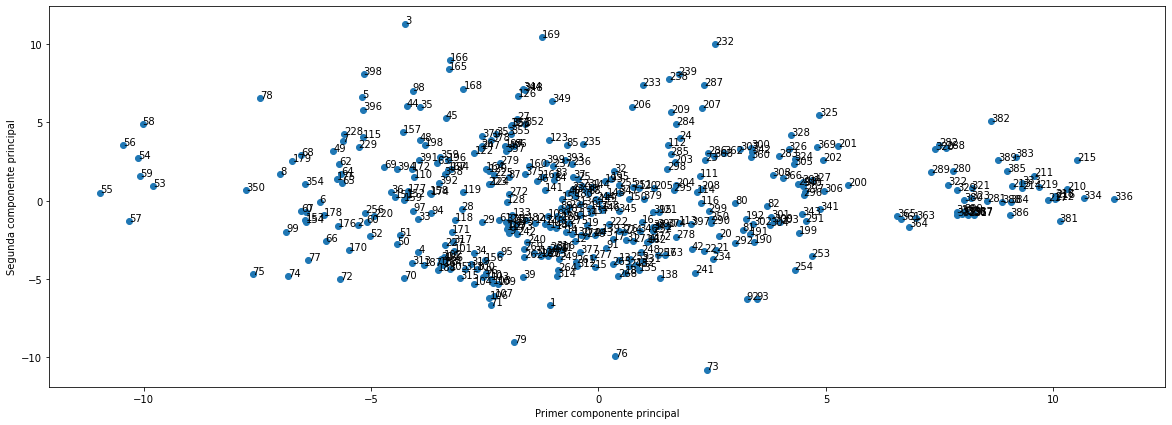

In [ ]:
fig, ax = plt.subplots(figsize = (20, 7))

# Hacemos un scatter plot de cada uno de los datos
ax.scatter(X_pca[:, 0], X_pca[:, 1])

# Por cada dato escribimos a qué instancia corresponde
for i in range(data.shape[0]):
  ax.text(X_pca[i, 0], X_pca[i, 1], s = i)

ax.set_xlabel('Primer componente principal')
ax.set_ylabel('Segunda componente principal')

Seleccionemos algunos puntos que estén muy distantes entre si y veamos a qué caras corresponden:

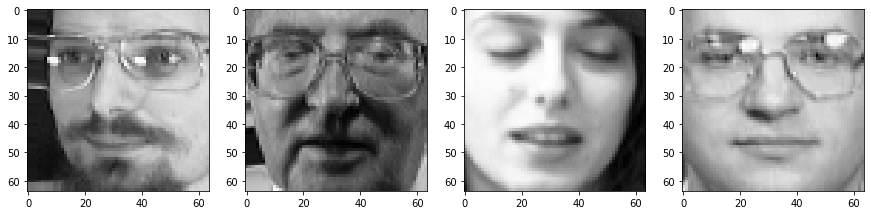

In [ ]:
# Lista de índices de caras
faceids = [169, 336, 76, 55]

fig, ax = plt.subplots(1, 4, figsize = (15, 5)) # seteo el tamano de la figura

ax[0].imshow(data[faceids[0], :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceids[j], en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
ax[1].imshow(data[faceids[1], :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceids[j], en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
ax[2].imshow(data[faceids[2], :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceids[j], en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
ax[3].imshow(data[faceids[3], :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceids[j], en formato (28,28) para imagenes en escala de grises (tengo que reshapear)

Veamos ahora algunos puntos que estén muy cerca entre si:

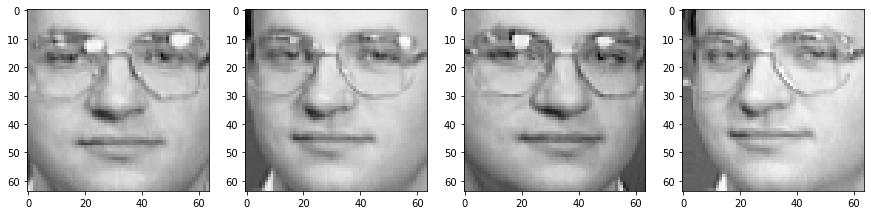

In [ ]:
# Lista de índices de caras
faceids = [55, 56, 57, 58]

fig, ax = plt.subplots(1, 4, figsize = (15, 5)) # seteo el tamano de la figura

ax[0].imshow(data[faceids[0], :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceids[j], en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
ax[1].imshow(data[faceids[1], :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceids[j], en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
ax[2].imshow(data[faceids[2], :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceids[j], en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
ax[3].imshow(data[faceids[3], :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceids[j], en formato (28,28) para imagenes en escala de grises (tengo que reshapear)

¿Qué concluímos con esto último? Reducir la dimensión en la que viven nuestros datos de forma inteligente (como con componentes principales) acerca instancias que son parecidas entre si, acercándonos a nosotros a la idea de *clustering* que vamos a ver en la clase siguiente.

### Fracción de varianza explicada

Elegimos empezar en forma arbitraria con un espacio bidimensional, pero cuánta información estamos reteniendo en ese espacio? Exploremos cuánto aporta cada componente principal, yéndonos ahora hasta 100 componentes (manteniéndonos siempre en un zona donde la cantidad de componentes principales sea bastante más chica que la dimensión del espacio original):

In [ ]:
# Creación del modelo de PCA con 100 componentes
pca = PCA(n_components=100)

# Ajuste y transformación de los datos
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Grafiquemos la información que aporta cada componente y la información acumulada:

Text(0.5, 0, 'Cantidad de componentes principales')

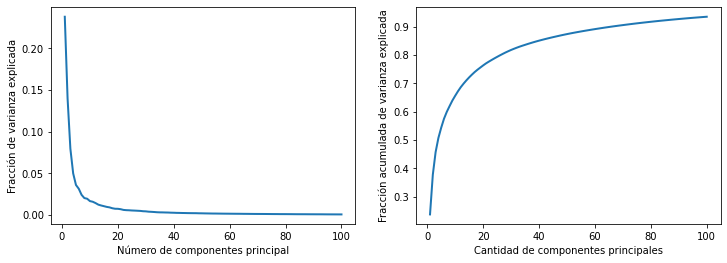

In [ ]:
# con .explained_variance_ratio_ vemos la fracción de información que aporta cada componente
evr = pca.explained_variance_ratio_

# Graficamos la fracción de varianza que aporta cada componente
# y la información acumulada
fig, ax = plt.subplots(1, 2, figsize = (12, 4))

ax[0].plot(range(1, len(evr) + 1), evr, '-', linewidth = 2)
ax[0].set_ylabel('Fracción de varianza explicada')
ax[0].set_xlabel('Número de componentes principal')

# Calculamos el acumulado con la función cumsum de numpy 
varianza_acumulada = np.cumsum(evr)

ax[1].plot(range(1, len(evr) + 1), varianza_acumulada, '-', linewidth = 2)
ax[1].set_ylabel('Fracción acumulada de varianza explicada')
ax[1].set_xlabel('Cantidad de componentes principales')

Notemos que a pesar que nuestros datos viven originalmente en un espacio de $4096$ features (píxeles) con solo 60 componentes principales alcanzamos alrededor del 90% de la información, lo cual implica una reducción dimensional bastante importante sin una pérdida tan significativa de la información.

### Visualización de las componentes principales

Veamos cómo se visualizan las primeras componentes en el espacio de features originales:

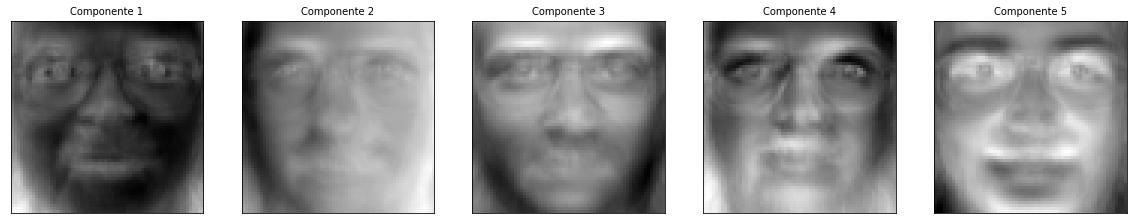

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (20, 10)) # seteo el tamano de la figura

# Hacemos un loop sobre las primeras 5 componentes
for pc in range(5):

  # Ploteo de la cara reconstruida con el mismo código de antes
  ax[pc].imshow(pca.components_[pc].reshape(64, 64), interpolation='none', cmap="gray") # plotea la image dada por pc-componente principal en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
  
  ax[pc].set_title("Componente {}".format(pc + 1), fontsize = 10) # pongo el titulo a los plots con el componente 
  
  ax[pc].set_xticks([]) # le saco los ticks en el eje X
  ax[pc].set_yticks([]) # le saco los ticks en el eje Y

plt.show()

Lo que vemos es que las componentes ya remiten a las figuras originales, es decir, detectan cierta ya cierto patrón global (otros algoritmos más sofisticados utilizados para la identificación de caras podrían detectar elementos aislados tales como un ojo, una nariz, una boca, etc., y así reconstruir la cara original).

### Reconstrucción de los datos a partir del espacio reducido

Tomemos un ejemplo y veamos qué pasa cuando tiramos las componentes principales más altas que contienen poca información. 

Empecemos seleccionando dicho ejemplo (pueden elegir el que quieran):

[]

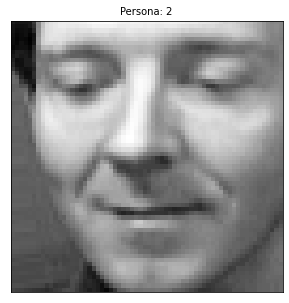

In [ ]:
# Elegimos alguna instancia en particular
faceid = 23

fig, ax = plt.subplots(figsize = (5, 5)) # seteo el tamano de la figura

ax.imshow(data[faceid, :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)

ax.set_title("Persona: {}".format(targets[faceid]), fontsize = 10) # pongo el titulo a los plots con el identificador unico de la persona 
ax.set_xticks([]) # le saco los ticks en el eje X
ax.set_yticks([]) # le saco los ticks en el eje Y

Veamos ahora cómo se ve la cara reconstruída cuando intentamos recuperar el espacio original con solo unas pocas componentes principales. Para reconstruir los datos desde el espacio reducido vamos a llamar al método:
~~~
pca.inverse_transform(X_pca)
~~~
Veamos la cara reconstruída desde el espacio de algunas componentes:

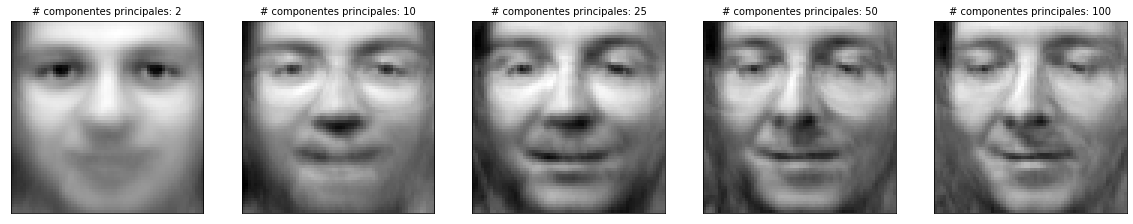

In [ ]:
fig, ax = plt.subplots(1, 5, figsize = (20, 10)) # seteo el tamano de la figura

fig_index = 0 # Indice para indicar donde hacer la figura

# Recorremos distinta cantidad de componentes
for p in [2, 10, 25, 50, 100]:

  # Creación del modelo de PCA con p componentes
  pca = PCA(n_components = p)

  # Ajuste y transformación de los datos
  pca.fit(data)
  X_pca = pca.transform(data)

  # Reconstrucción de la cara desde el espacio reducido!!!
  X_r = pca.inverse_transform(X_pca)

  # Ploteo de la cara reconstruida con el mismo código de antes
  ax[fig_index].imshow(X_r[faceid, :].reshape(64, 64), interpolation='none', cmap="gray") # plotea la imagen de índice faceid en formato (28,28) para imagenes en escala de grises (tengo que reshapear)
  
  ax[fig_index].set_title("# componentes principales: {}".format(p), fontsize = 10) # pongo el titulo a los plots con el identificador unico de la persona 
  
  ax[fig_index].set_xticks([]) # le saco los ticks en el eje X
  ax[fig_index].set_yticks([]) # le saco los ticks en el eje Y

  fig_index += 1

plt.show()

¿Qué vemos? Cuanto más componentes principales hayamos preservado mejor será la reproducción de la cara original (ver en la figura de varianza explicada cuánta información retuvimos en cada caso). Sin embargo con pocas componentes (con muchas menos que la cantidad de features del espacio original) ya logramos imágenes bastantes fieles de la imagen original.

## Cosas para llevarse de esta notebook 

Lo nuevo de esta notebook es el método para reconstruir el espacio original con algunas componentes principales. Si las componentes principales son menos que la cantidad de features del espacio original, en el medio habremos perdido información. Sin embargo es una técnica para comprimir precisamente la información.

Para tratar de recuperar el espacio original luego de ajustar sería entonces:
~~~
from sklearn.decomposition import PCA

pca = PCA(n_components = p)
pca.fit(X)
X_pca = pca.transform(X)

# X reconstruida
X_r = pca.inverse_transform(X_pca)
~~~

Por último, en esta notebook no hizo falta escalear las variables ya que todos los píxeles tienen el mismo rango. Si estuvieramos en un caso donde escaleamos, para reconstruir el espacio original tenemos que además anti-transformar el escaleo:
~~~
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

std_scale = StandardScaler()

std_scale.fit(X)
X_scaled = std_scale.transform(X)

pca = PCA(n_components = p)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

# X reconstruida pero aun escaleada
X_r_scaled = pca.inverse_transform(X_pca)

# X reconstruida invirtiendo el escaleo
X_r = std_scale.inverse_transform(X_r_scaled)
~~~

## Cosas para hacer:
- Elija algún otro dataset visto en la materia. Seleccione un conjunto  (en lo posible, grande) de features y obtenga sus componentes principales. (Observación: si el dataset original tiene muchas dimensiones, no es conveniente computacionalmente encontrar todas las componentes principales, sino solamente las primeras 100 por ejemplo).
- Visualice los datos en el espacio de las dos primeras componentes e inspeccione qué significado tienen estas componentes (cómo se escribe su vector en el espacio de features).
- Analice la cantidad de información que se lleva cada componente y adopte un criterio para reducir la dimensionalidad (por ejemplo, la cantidad de componentes necesaria para captar el 25, 50 o 90% de información). Reconstruya los datos desde este espacio reducido.

